# Importing Libraries

In [3]:
import os
import cv2
import keras
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.utils import shuffle
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import datasets, layers, models
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
%matplotlib inline

# Loading Data

In [99]:
dataset_path = os.listdir("Datasets/Data")
signature_types = os.listdir("Datasets/Data")
print(signature_types)
print("signatures found are: " + str(len(dataset_path)))

['Real', 'Forged']
signatures found are: 2


In [100]:
signatures = []
for item in signature_types:
    # Get all file names
    all_signatures = os.listdir("Datasets/Data" + "/" + item)
    # print(all_signatures)
    
    # Add them to the list
    for signature in all_signatures:
        signatures.append((item, str("Datasets/Data" + "/" + item) + "/" + signature))
        
print(signatures)

[('Real', 'Datasets/Data/Real/RealSignature6364.png'), ('Real', 'Datasets/Data/Real/RealSignature9057.png'), ('Real', 'Datasets/Data/Real/RealSignature8349.png'), ('Real', 'Datasets/Data/Real/RealSignature784.png'), ('Real', 'Datasets/Data/Real/RealSignature4573.png'), ('Real', 'Datasets/Data/Real/RealSignature2102.png'), ('Real', 'Datasets/Data/Real/RealSignature2664.png'), ('Real', 'Datasets/Data/Real/RealSignature4215.png'), ('Real', 'Datasets/Data/Real/RealSignature6402.png'), ('Real', 'Datasets/Data/Real/RealSignature7708.png'), ('Real', 'Datasets/Data/Real/RealSignature6416.png'), ('Real', 'Datasets/Data/Real/RealSignature1379.png'), ('Real', 'Datasets/Data/Real/RealSignature2670.png'), ('Real', 'Datasets/Data/Real/RealSignature4201.png'), ('Real', 'Datasets/Data/Real/RealSignature3208.png'), ('Real', 'Datasets/Data/Real/RealSignature790.png'), ('Real', 'Datasets/Data/Real/RealSignature4567.png'), ('Real', 'Datasets/Data/Real/RealSignature948.png'), ('Real', 'Datasets/Data/Real/R

# Exploring The Dataset

In [101]:
# Building a dataframe

signatures_df = pd.DataFrame(data=signatures, columns=["Label", "Image"])
signatures_df.head()

,Label,Image
0,Real,Datasets/Data/Real/RealSignature6364.png
1,Real,Datasets/Data/Real/RealSignature9057.png
2,Real,Datasets/Data/Real/RealSignature8349.png
3,Real,Datasets/Data/Real/RealSignature784.png
4,Real,Datasets/Data/Real/RealSignature4573.png


In [102]:
print("Total number of signatures in the dataset: " + str(len(signatures_df)))
print("Shape of the dataset: " + str((signatures_df.shape)))
print("Null Values Exist: " + str(signatures_df.isnull().any()))

Total number of signatures in the dataset: 14501
Shape of the dataset: (14501, 2)
Null Values Exist: Label    False
Image    False
dtype: bool


In [103]:
signatures_df.groupby("Label").count().transpose()

Label,Forged,Real
Image,5341,9160


<AxesSubplot:xlabel='Label', ylabel='count'>

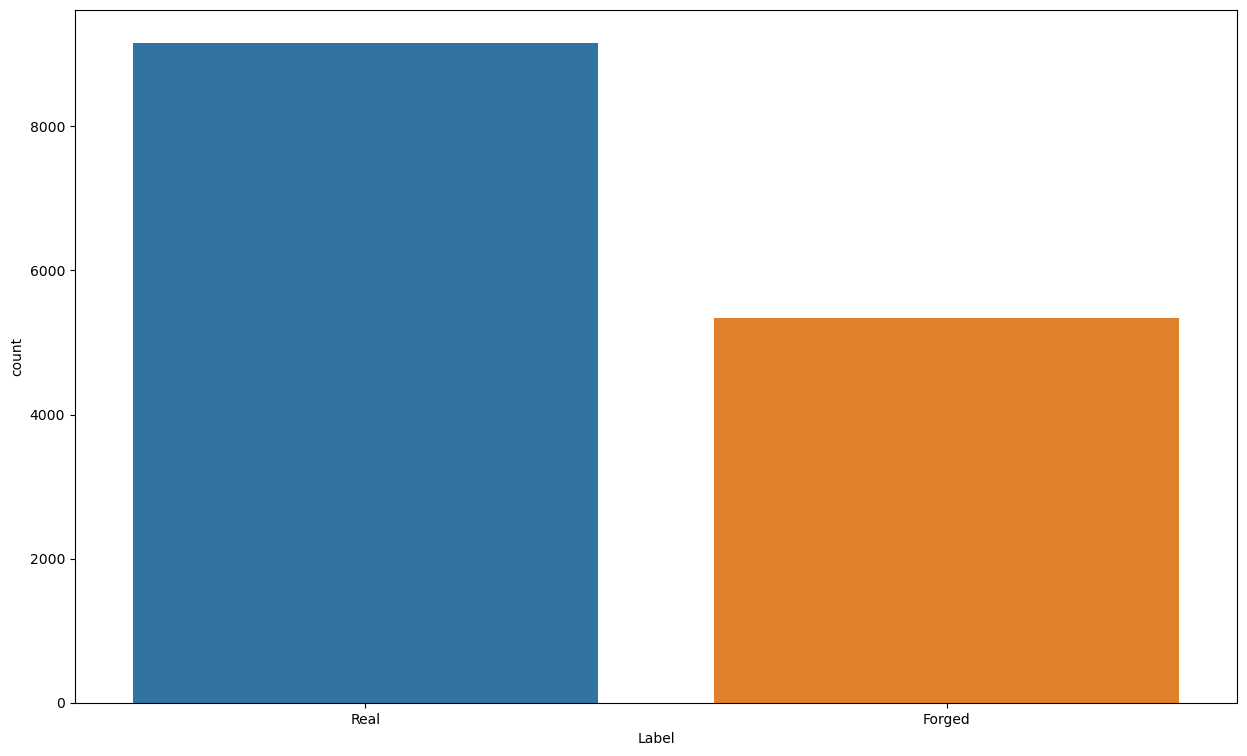

In [104]:
plt.figure(figsize=(15,9))
sns.countplot(x=signatures_df["Label"])

In [105]:
path = "Datasets/Data/"

im_size = 150

images = []
labels = []

for i in signature_types:
    data_path = path + str(i)
    filenames = [i for i in os.listdir(data_path)]
    
    for f in filenames:
        img = cv2.imread(data_path + "/" + f)
        if img is None:
            print('Wrong path:', data_path)
        else:
            img = cv2.resize(img, (im_size, im_size))
            images.append(img)
            labels.append(i)

Wrong path: Datasets/Data/Forged


In [106]:
images = np.array(images, dtype="float32")
images.shape

(14500, 150, 150, 3)

In [107]:
label = pd.DataFrame(labels, columns=["labels"])
label.head()

,labels
0,Real
1,Real
2,Real
3,Real
4,Real


In [108]:
y_labelencoder = LabelEncoder()
Y = label["labels"].values
Y = y_labelencoder.fit_transform(Y)
Y = np.array(Y, dtype="int32")
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [109]:
images, Y = shuffle(images, Y, random_state = 1)
x_train, x_test, y_train, y_test = train_test_split(images, Y, test_size=0.2, random_state = 5)
print("Training Set Features: ", x_train.shape)
print("Training Set Lables: ", y_train.shape)
print("Test Set Features: ", x_test.shape)
print("Test Set Labels: ", y_test.shape)

Training Set Features:  (11600, 150, 150, 3)
Training Set Lables:  (11600,)
Test Set Features:  (2900, 150, 150, 3)
Test Set Labels:  (2900,)


# Building Custom CNN Model

In [17]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20)

cnn_model = tf.keras.Sequential([
    layers.Conv2D(32, (3,3), activation = "relu", input_shape = (150, 150, 3)), layers.MaxPooling2D(),
    layers.Conv2D(32, (3,3), activation = "relu", input_shape = (150, 150, 3)), layers.MaxPooling2D(),
    layers.Conv2D(32, (3,3), activation = "relu"), layers.MaxPooling2D(),
    
    layers.Flatten(),
    layers.Dense(128, activation=tf.nn.relu),
    layers.Dense(6, activation=tf.nn.softmax)
    
])

In [22]:
cnn_model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [23]:
history = cnn_model.fit(x_train, y_train, epochs=10, batch_size=10, validation_data = (x_test, y_test), callbacks = [early_stop])
history 

Epoch 1/10
1160/1160 [==============================] - 162s 138ms/step - loss: 1.1225 - accuracy: 0.7001 - val_loss: 0.6617 - val_accuracy: 0.6266
Epoch 2/10
1160/1160 [==============================] - 156s 134ms/step - loss: 0.6664 - accuracy: 0.6337 - val_loss: 0.6556 - val_accuracy: 0.6228
Epoch 3/10
1160/1160 [==============================] - 142s 122ms/step - loss: 0.6562 - accuracy: 0.6323 - val_loss: 0.6662 - val_accuracy: 0.6266
Epoch 4/10
1160/1160 [==============================] - 155s 133ms/step - loss: 0.6570 - accuracy: 0.6329 - val_loss: 0.6619 - val_accuracy: 0.6266
Epoch 5/10
1160/1160 [==============================] - 153s 132ms/step - loss: 0.6583 - accuracy: 0.6329 - val_loss: 0.6605 - val_accuracy: 0.6266
Epoch 6/10
1160/1160 [==============================] - 150s 129ms/step - loss: 0.6581 - accuracy: 0.6329 - val_loss: 0.6648 - val_accuracy: 0.6266
Epoch 7/10
1160/1160 [==============================] - 149s 128ms/step - loss: 0.6582 - accuracy: 0.6329 - val_

In [24]:
cnn_output_df = pd.DataFrame(cnn_model.history.history)
cnn_output_df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.122499,0.700086,0.661700,0.626552
1,0.666436,0.633707,0.655568,0.622759
2,0.656173,0.632328,0.666222,0.626552
3,0.657048,0.632931,0.661895,0.626552
4,0.658336,0.632931,0.660494,0.626552


In [25]:
def plot_accuracy_loss(history):
    
#   plot accuracy
    plt.figure(figsize= (15,10))
    plt.subplot(221)
    plt.plot(history.history["accuracy"], "bo--", label = "Training Accuracy")
    plt.plot(history.history["val_accuracy"], "ro--", label = "Validation Accuracy")
    plt.title("Train Accuracy vs Test Accuracy", fontsize=20)
    plt.ylabel("Accuracy", fontsize=18)
    plt.xlabel("Epochs", fontsize=19)
    plt.legend()
    plt.show()
    
#   plot loss function
    plt.figure(figsize= (15,10))
    plt.subplot(221)
    plt.plot(history.history["loss"], "bo--", label = "Training Loss")
    plt.plot(history.history["val_loss"], "ro--", label = "Validation Loss")
    plt.title("Train Loss vs Test Loss", fontsize=20)
    plt.ylabel("Loss", fontsize=18)
    plt.xlabel("Epochs", fontsize=18)
    plt.legend()
    plt.show()

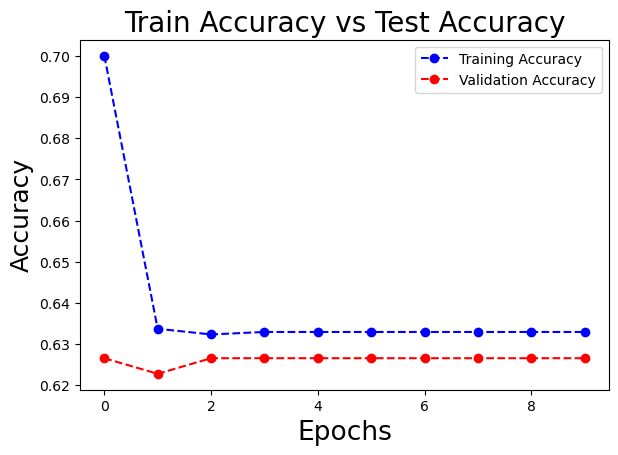

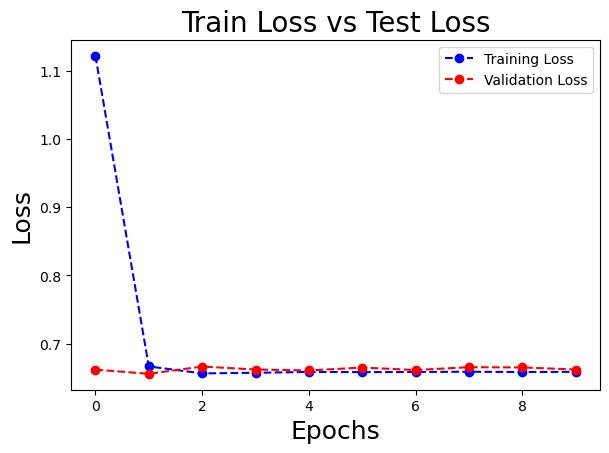

In [26]:
plot_accuracy_loss(history)

In [27]:
cnn_model.evaluate(x_test, y_test)
print(" ")
print(" ")
y_pred = cnn_model.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print(" ")
print(" ")
print("classification_report: \n", classification_report(y_test, y_pred_classes))
print(" ")
print(" ")
print("Confussion Matrix: \n", confusion_matrix(y_test, y_pred_classes))

91/91 [==============================] - 6s 68ms/step - loss: 0.6618 - accuracy: 0.6266
 
 
91/91 [==============================] - 6s 68ms/step
 
 
classification_report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1083
           1       0.63      1.00      0.77      1817

    accuracy                           0.63      2900
   macro avg       0.31      0.50      0.39      2900
weighted avg       0.39      0.63      0.48      2900

 
 
Confussion Matrix: 
 [[   0 1083]
 [   0 1817]]


/Users/mac/Public/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/Public/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/Public/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Using VGG16 Model

In [110]:
import warnings
from __future__ import print_function
from keras.models import Model
from keras.preprocessing import image
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.models import load_model
from keras.utils import layer_utils, image_dataset_from_directory
from keras.utils.data_utils import get_file
from keras import backend as K
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.applications.vgg16 import VGG16
from keras.layers import Flatten, Dense, Input, Conv2D, MaxPooling2D
from keras.layers import GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.applications.imagenet_utils import obtain_input_shape
from keras.utils.layer_utils import get_source_inputs

In [111]:
vgg16_model = VGG16(include_top=False, weights="imagenet",input_shape=(150, 150, 3))
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [175]:
new_cnn_model = tf.keras.Sequential()

new_cnn_model.add(vgg16_model)
new_cnn_model.add(layers.Flatten())
new_cnn_model.add(Dense(256, activation=tf.nn.relu))
new_cnn_model.add(Dense(1, activation=tf.nn.sigmoid))

In [176]:
new_cnn_model.trainable = False
new_cnn_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_8 (Flatten)         (None, 8192)              0         
                                                                 
 dense_16 (Dense)            (None, 256)               2097408   
                                                                 
 dense_17 (Dense)            (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 0
Non-trainable params: 16,812,353
_________________________________________________________________


In [22]:
train_ds = image_dataset_from_directory(
        directory = "Datasets/Train",
        labels = "inferred",
        label_mode = "int",
        batch_size = 32,
        image_size = (150, 150)
)

test_ds = image_dataset_from_directory(
        directory = "Datasets/Test",
        labels = "inferred",
        label_mode = "int",
        batch_size = 32,
        image_size = (150, 150)
)

Found 11600 files belonging to 2 classes.
Found 2900 files belonging to 2 classes.


In [24]:
# normalize and scale
def process(image, label):
    image = tf.cast(image/255., tf.float32)
    return image, label

train_ds=train_ds.map(process)
test_ds=test_ds.map(process)

In [28]:
new_cnn_model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20)
history_new = new_cnn_model.fit(train_ds, epochs=5, validation_data = test_ds, callbacks=[early_stop])
history_new 

Epoch 1/10
363/363 [==============================] - 802s 2s/step - loss: 0.7900 - accuracy: 0.3620 - val_loss: 0.7872 - val_accuracy: 0.3569
Epoch 2/10
363/363 [==============================] - 860s 2s/step - loss: 0.7900 - accuracy: 0.3620 - val_loss: 0.7872 - val_accuracy: 0.3569
Epoch 3/10
363/363 [==============================] - 865s 2s/step - loss: 0.7900 - accuracy: 0.3620 - val_loss: 0.7872 - val_accuracy: 0.3569
Epoch 4/10
363/363 [==============================] - 855s 2s/step - loss: 0.7900 - accuracy: 0.3620 - val_loss: 0.7872 - val_accuracy: 0.3569
Epoch 5/10
363/363 [==============================] - 840s 2s/step - loss: 0.7900 - accuracy: 0.3620 - val_loss: 0.7872 - val_accuracy: 0.3569
Epoch 6/10
363/363 [==============================] - 893s 2s/step - loss: 0.7900 - accuracy: 0.3620 - val_loss: 0.7872 - val_accuracy: 0.3569
Epoch 7/10
113/363 [========>.....................] - ETA: 10:28 - loss: 0.7902 - accuracy: 0.3639

In [86]:
def plot_accuracy_loss(history_new):
    
#   plot accuracy
    plt.figure(figsize= (15,10))
    plt.subplot(221)
    plt.plot(history_new.history["accuracy"], "bo--", label = "Training Accuracy")
    plt.plot(history_new.history["val_accuracy"],  "ro--", label = "Validation Accuracy")
    plt.title("Train Accuracy vs Test Accuracy", fontsize=20)
    plt.ylabel("Accuracy", fontsize=18)
    plt.xlabel("Epochs", fontsize=19)
    plt.legend()
    plt.show()
    
#   plot loss function
    plt.figure(figsize= (15,10))
    plt.subplot(221)
    plt.plot(history_new.history["loss"], "bo--", label = "Training Loss")
    plt.plot(history_new.history["val_loss"], "ro--", label = "Validation Loss")
    plt.title("Train Loss vs Test Loss", fontsize=20)
    plt.ylabel("Loss", fontsize=18)
    plt.xlabel("Epochs", fontsize=18)
    plt.legend()
    plt.show()

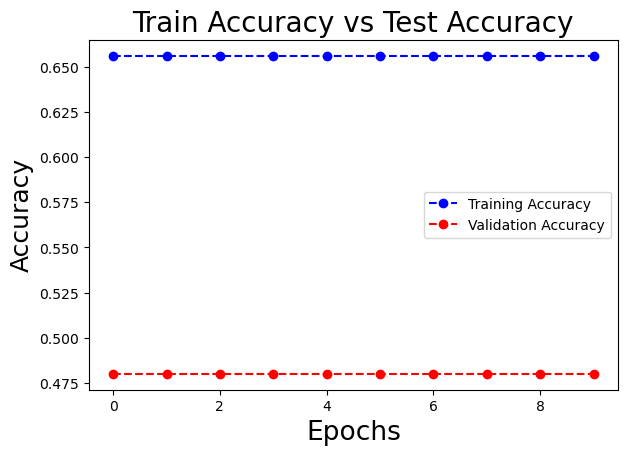

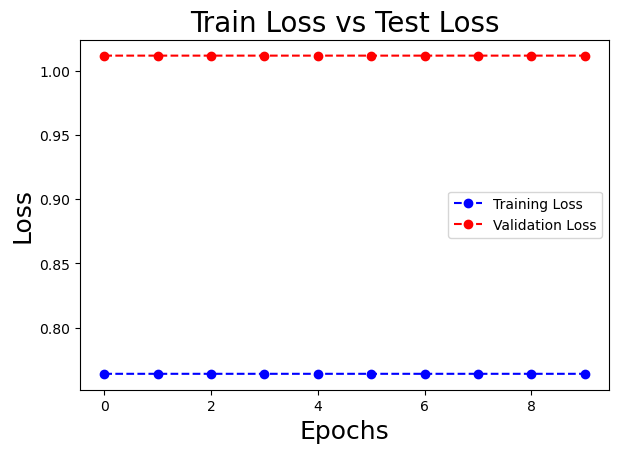

In [87]:
plot_accuracy_loss(history_new)

In [112]:
vgg16_model.trainable = True
set_trainable = False

for layer in vgg16_model.layers:
    if layer.name == "block5_conv1":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
for layer in vgg16_model.layers:
    print(layer.name, layer.trainable)

input_3 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [113]:
cnn_model_new = tf.keras.Sequential()

cnn_model_new.add(vgg16_model)
cnn_model_new.add(layers.Flatten())
cnn_model_new.add(Dense(256, activation=tf.nn.relu))
cnn_model_new.add(Dense(1, activation=tf.nn.sigmoid))

In [114]:
cnn_model_new.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               2097408   
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [115]:
# normalize and scale
def process__(image):
    image = tf.cast(image/255., tf.float32)
    return image

x_train = process__(x_train)
x_test = process__(x_test)

In [116]:
cnn_model_new.compile(optimizer = keras.optimizers.RMSprop(learning_rate=1e-5), 
                      loss = "binary_crossentropy", 
                      metrics = ["accuracy"])

In [117]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20)
history_new = cnn_model_new.fit(x_train, y_train, epochs=3, validation_data = (x_test, y_test), callbacks=[early_stop])
history_new

Epoch 1/3
363/363 [==============================] - 971s 3s/step - loss: 0.1501 - accuracy: 0.9457 - val_loss: 0.0258 - val_accuracy: 0.9972
Epoch 2/3
363/363 [==============================] - 969s 3s/step - loss: 0.0115 - accuracy: 0.9983 - val_loss: 0.0039 - val_accuracy: 0.9997
Epoch 3/3
363/363 [==============================] - 918s 3s/step - loss: 0.0016 - accuracy: 0.9998 - val_loss: 0.0042 - val_accuracy: 0.9979


In [118]:
cnn_new_output_df = pd.DataFrame(history_new.history)
cnn_new_output_df

,loss,accuracy,val_loss,val_accuracy
0,0.150099,0.945690,0.025817,0.997241
1,0.011496,0.998276,0.003886,0.999655
2,0.001603,0.999828,0.004157,0.997931


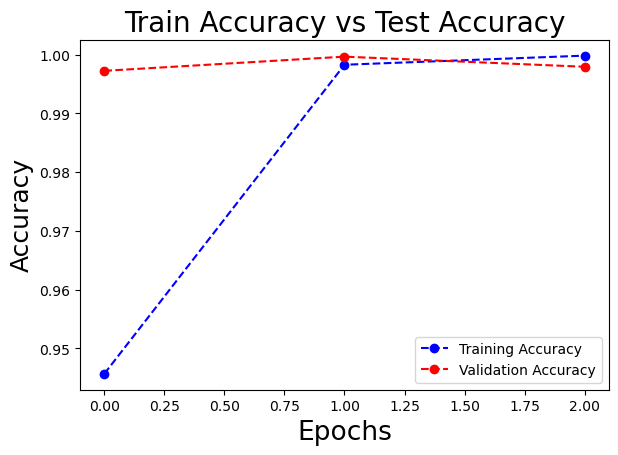

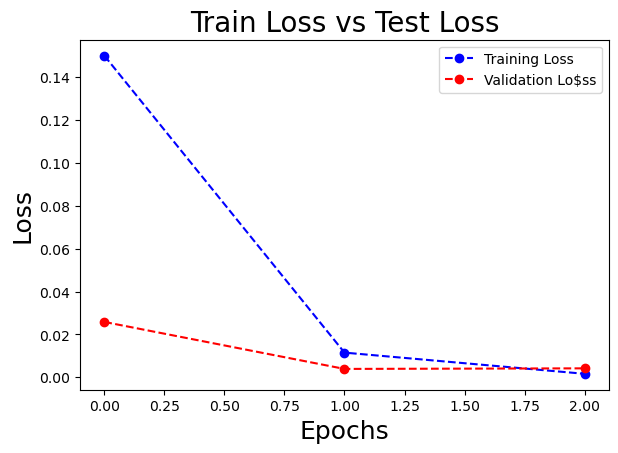

In [119]:
def plot_accuracy_loss(history_new):
    
#   plot accuracy
    plt.figure(figsize= (15,10))
    plt.subplot(221)
    plt.plot(history_new.history["accuracy"], "bo--", label = "Training Accuracy")
    plt.plot(history_new.history["val_accuracy"], "ro--", label = "Validation Accuracy")
    plt.title("Train Accuracy vs Test Accuracy", fontsize=20)
    plt.ylabel("Accuracy", fontsize=18)
    plt.xlabel("Epochs", fontsize=19)
    plt.legend()
    plt.show()
    
#   plot loss function
    plt.figure(figsize= (15,10))
    plt.subplot(221)
    plt.plot(history_new.history["loss"], "bo--", label = "Training Loss")
    plt.plot(history_new.history["val_loss"], "ro--", label = "Validation Lo$ss")
    plt.title("Train Loss vs Test Loss", fontsize=20)
    plt.ylabel("Loss", fontsize=18)
    plt.xlabel("Epochs", fontsize=18)
    plt.legend()
    plt.show()

plot_accuracy_loss(history_new)

In [120]:
predictions = (cnn_model_new.predict(x_test) > 0.5).astype("int32")
print(" ")
cnn_model_new.evaluate(x_test, y_test)
print(" ")
predictions

91/91 [==============================] - 139s 2s/step
 
91/91 [==============================] - 142s 2s/step - loss: 0.0042 - accuracy: 0.9979
 


array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [129]:
print("Accuracy Score: \n", accuracy_score(y_test,predictions), "or", str(int(accuracy_score(y_test,predictions) * 100))+str("%") )
print(" ")
print(" ")
print("Confusion Matrix: \n",confusion_matrix(y_test, predictions))
print(" ")
print(" ")
print("Classification Report: \n",classification_report(y_test, predictions))

Accuracy Score: 
 0.9979310344827587 or 99%
 
 
Confusion Matrix: 
 [[1077    6]
 [   0 1817]]
 
 
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      1083
           1       1.00      1.00      1.00      1817

    accuracy                           1.00      2900
   macro avg       1.00      1.00      1.00      2900
weighted avg       1.00      1.00      1.00      2900



In [130]:
cnn_model_new.save("model.h5")

In [131]:
model = load_model("model.h5")

Input image shape:  (1, 150, 150, 3)


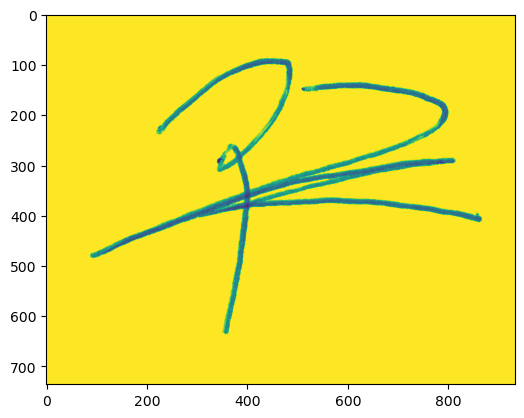

In [134]:
img_path = "test1.png"

my_image = imread(img_path)
imshow(my_image)

im_size = 150
img = cv2.imread(img_path)
img = cv2.resize(img, (im_size, im_size))s
img = np.array(img, dtype="float32")
x = process__(img)
x = np.expand_dims(x, axis=0)
print("Input image shape: ", x.shape)

In [135]:
prediction = (model.predict(x) > 0.5).astype("int32")
if prediction[0][0] == 1:
    print("Real Signature Detected")
else:
    print("Forged Signature Detected")

1/1 [==============================] - 0s 93ms/step
Forged Signature Detected
